In [285]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

# Differentiate a Logsitic Function

In [2]:
def sum_logistic(x):
    return jnp.sum(1.0 / (1.0 + jnp.exp(-x)))

x_small = jnp.arange(3.)
derivative_fn = grad(sum_logistic)
print(derivative_fn(x_small))

[0.25       0.19661197 0.10499357]


In [3]:
def poly(x,y):
    return jnp.sum(x*x + x*y + x*x*y)

In [4]:
x = jnp.arange(-5,5,dtype = float)
y = jnp.arange(-5,5,dtype = float)

In [5]:
derivative_poly = grad(poly)

In [6]:
derivative_poly(x,y)

DeviceArray([35., 20.,  9.,  2., -1.,  0.,  5., 14., 27., 44.], dtype=float32)

## Some scikit-learn blobs

In [7]:
from sklearn.datasets import make_blobs

In [8]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,random_state=0,cluster_std=0.25)

In [15]:
X.shape

(100, 2)

In [16]:
y.shape

(100,)

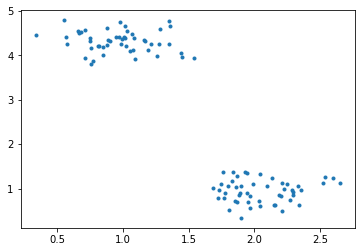

In [9]:
plt.plot(X[:,0],X[:,1],'.')

## Make a Blob Centroid Loss Function

In [47]:
def blobLoss(centroidX,centroidY):
    
    return jnp.sum(jnp.sqrt(jnp.add(jnp.square(jnp.subtract(X[:,[0]], centroidX)), jnp.square(jnp.subtract(X[:,[1]], centroidY)))))

In [14]:
blobLoss(0.5,1.5)

DeviceArray(226.62598, dtype=float32)

In [24]:
X[:,[1]].shape

(100, 1)

## Make a Broadcast Blob Loss Function

In [37]:
def blobLossBroadcast(centroidX,centroidY):
    
    return jnp.sum(jnp.sqrt(jnp.add(jnp.square(jnp.subtract(X[:,[0]], centroidX)), jnp.square(jnp.subtract(X[:,[1]], centroidY)))),axis = 0)

In [41]:
trialX = jnp.asarray([0.1,0.2,1.5])
trialY = jnp.asarray([0.1,0.2,2.0])

print(trialX.shape)
print(trialY.shape)

blobLossBroadcast(trialX,trialY)

(3,)
(3,)


DeviceArray([322.66986, 310.31793, 180.0839 ], dtype=float32)

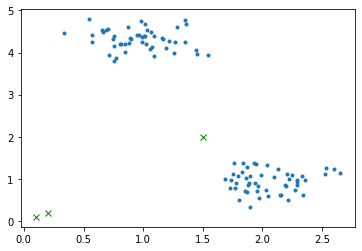

In [42]:
plt.plot(X[:,0],X[:,1],'.')
plt.plot(trialX,trialY,'x',color = 'green')

In [45]:
blobLossGrad = grad(blobLoss)

In [111]:
x = jnp.arange(0,3,0.1,dtype = float)
y = jnp.arange(0,3,0.1,dtype = float)

In [112]:
x

DeviceArray([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1,
             1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3,
             2.4, 2.5, 2.6, 2.7, 2.8, 2.9], dtype=float32)

In [113]:
y

DeviceArray([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1,
             1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3,
             2.4, 2.5, 2.6, 2.7, 2.8, 2.9], dtype=float32)

## Blob Loss Function Without Broadcasting

In [114]:
def blobLoss(centroidX,centroidY):
    
    diffX = jnp.subtract(X[:,[0]], centroidX)
    diffY = jnp.subtract(X[:,[1]], centroidY)
    
    print(diffX.shape)
    print(diffY.shape)
    
    print(centroidX.shape)
    print(centroidY.shape)
    
    print(X[:,[0]].shape)
    print(X[:,[1]].shape)
    
    return jnp.sum(jnp.sqrt(jnp.add(jnp.square(diffX), jnp.square(diffY))))

In [115]:
blobLossGrad = grad(blobLoss)

In [116]:
grads = blobLossGrad(jnp.transpose(x),jnp.transpose(y))

(100, 30)
(100, 30)
(30,)
(30,)
(100, 1)
(100, 1)


In [121]:
grads.shape

(30,)

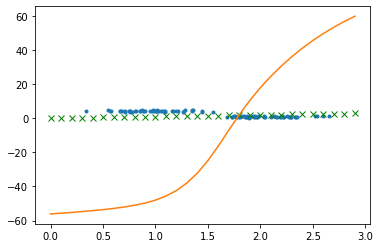

In [118]:
plt.plot(X[:,0],X[:,1],'.')
plt.plot(x,y,'x',color = 'green')

plt.plot(x,grads)

## Make a blob loss function that takes a 2D Grid

In [260]:
def blobLossGrid(centroid):
    
    diffX = jnp.subtract(X[:,[0]], centroid[0])
    diffY = jnp.subtract(X[:,[1]], centroid[1])
    
    #print('centroid:',centroid)
    
    print(diffX.shape)
    print(diffY.shape)
    
    print(centroid[0].shape)
    print(centroid[1].shape)
    
    print(X[:,[0]].shape)
    print(X[:,[1]].shape)
    
    print(jnp.add(jnp.square(diffX), jnp.square(diffY)).shape)
    #print('sqrt',jnp.sqrt(jnp.add(jnp.square(diffX), jnp.square(diffY))).shape)
    
    finalSum = jnp.sum(jnp.sqrt(jnp.add(jnp.square(diffX), jnp.square(diffY))))
    
    print('sum',finalSum.shape)
    #print(finalSum)
    
    return finalSum

## Make a 2-D grid of centroids and flatten to 1-D

In [275]:
xy = jnp.mgrid[0.:5.:0.1, 0.:5.:0.1].reshape(2,-1).T

In [342]:
blobLossGridGrad = vmap(grad(blobLossGrid))

In [343]:
grads = blobLossGridGrad(xy)

(100, 1)
(100, 1)
()
()
(100, 1)
(100, 1)
(100, 1)
sum ()


In [233]:
grads

DeviceArray([[-56.100132, -69.46554 ],
             [-57.145206, -67.53551 ],
             [-58.14829 , -65.50505 ],
             ...,
             [ 59.74977 ,  12.667203],
             [ 59.78813 ,  14.370957],
             [ 59.90482 ,  16.111042]], dtype=float32)

In [266]:
xy[0:2]

DeviceArray([[0. , 0. ],
             [0. , 0.1]], dtype=float32)

In [344]:
grads = blobLossGridGrad(xy)

(100, 1)
(100, 1)
()
()
(100, 1)
(100, 1)
(100, 1)
sum ()


In [345]:
grads

DeviceArray([[-56.100132, -69.46554 ],
             [-57.145206, -67.53551 ],
             [-58.14829 , -65.50505 ],
             ...,
             [ 79.851326,  44.680088],
             [ 79.20886 ,  46.306152],
             [ 78.5485  ,  47.90195 ]], dtype=float32)

In [267]:
blobLossGrid(xy[0])

(100, 1)
(100, 1)
()
()
(100, 1)
(100, 1)
(100, 1)
sum ()


DeviceArray(335.16217, dtype=float32)

DeviceArray(2001, dtype=int32)

In [329]:
jnp.argmin(jnp.sum(jnp.abs(grads),axis = 1))

DeviceArray(730, dtype=int32)

In [309]:
jnp.argmin(jnp.abs(grads))

DeviceArray(1171, dtype=int32)

In [311]:
grads[jnp.argmin(jnp.abs(grads))]

DeviceArray([35.86073  ,  4.8768044], dtype=float32)

Text(0.5, 1.0, 'Grad wrt x')

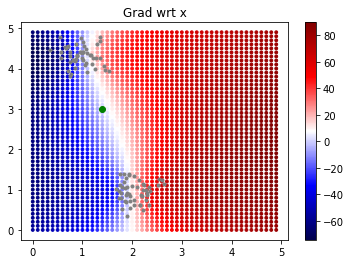

In [332]:
cmap = plt.cm.seismic
norm = colors.Normalize(vmin=jnp.min(grads[:,0]), vmax=jnp.max(grads[:,0]))
plt.scatter(xy[:,0],xy[:,1], color=cmap(norm(grads[:,0])),s = 8)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm)

plt.plot(X[:,0],X[:,1],'.',color = 'grey')

minCentroid = xy[jnp.argmin(jnp.abs(grads))]
minCentroid = xy[jnp.argmin(jnp.sum(jnp.abs(grads),axis = 1))]

plt.plot(minCentroid[0],minCentroid[1],'o',color = 'green')

plt.title('Grad wrt x')

Text(0.5, 1.0, 'Grad wrt y')

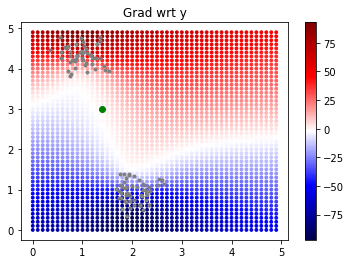

In [340]:
cmap = plt.cm.seismic
norm = colors.Normalize(vmin=jnp.min(grads[:,1]), vmax=jnp.max(grads[:,1]))
plt.scatter(xy[:,0],xy[:,1], color=cmap(norm(grads[:,1])),s = 8)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm)

plt.plot(X[:,0],X[:,1],'.',color = 'grey')

minCentroid = xy[jnp.argmin(jnp.abs(grads))]
minCentroid = xy[jnp.argmin(jnp.sum(jnp.abs(grads),axis = 1))]


plt.plot(minCentroid[0],minCentroid[1],'o',color = 'green')

plt.title('Grad wrt y')

In [334]:
totalGrad = grads[:,0] + grads[:,1]

Text(0.5, 1.0, 'Total Grad')

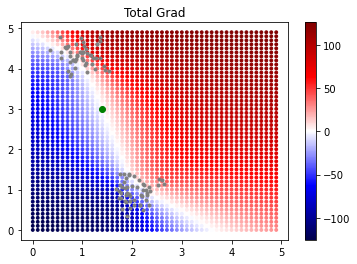

In [341]:
cmap = plt.cm.seismic
norm = colors.Normalize(vmin=jnp.min(totalGrad), vmax=jnp.max(totalGrad))
plt.scatter(xy[:,0],xy[:,1], color=cmap(norm(totalGrad)),s = 8)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm)

plt.plot(X[:,0],X[:,1],'.',color = 'grey')

#minCentroid = xy[jnp.argmin(jnp.abs(totalGrad))]
#minCentroid = xy[jnp.argmin(jnp.abs(totalGrad))]


plt.plot(minCentroid[0],minCentroid[1],'o',color = 'green')

plt.title('Total Grad')